In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder
from apyori import apriori


data=pd.read_csv('/content/Supermarket Sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.shape

(1000, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data['Product line'].isna().sum()

0

In [ ]:
transactions=data['Product line'].apply (lambda t: t.split('and'))

In [ ]:
transactions=list(transactions)
print(transactions[0])
print(type(transactions))

['Health ', ' beauty']
<class 'list'>


In [ ]:
print(len(transactions))

1000


In [ ]:
file=[item for transaction in transactions for item in transaction]
items=list(set(file))
rules=list(permutations(items,2))
print(rules)

[(' travel', ' beverages'), (' travel', 'Sports '), (' travel', 'Health '), (' travel', 'Fashion accessories'), (' travel', 'Food '), (' travel', 'Electronic accessories'), (' travel', ' beauty'), (' travel', ' lifestyle'), (' travel', 'Home '), (' beverages', ' travel'), (' beverages', 'Sports '), (' beverages', 'Health '), (' beverages', 'Fashion accessories'), (' beverages', 'Food '), (' beverages', 'Electronic accessories'), (' beverages', ' beauty'), (' beverages', ' lifestyle'), (' beverages', 'Home '), ('Sports ', ' travel'), ('Sports ', ' beverages'), ('Sports ', 'Health '), ('Sports ', 'Fashion accessories'), ('Sports ', 'Food '), ('Sports ', 'Electronic accessories'), ('Sports ', ' beauty'), ('Sports ', ' lifestyle'), ('Sports ', 'Home '), ('Health ', ' travel'), ('Health ', ' beverages'), ('Health ', 'Sports '), ('Health ', 'Fashion accessories'), ('Health ', 'Food '), ('Health ', 'Electronic accessories'), ('Health ', ' beauty'), ('Health ', ' lifestyle'), ('Health ', 'Home

In [ ]:
print(len(rules))

90


In [ ]:
encoder=TransactionEncoder().fit(transactions)

In [ ]:
onehot=encoder.transform(transactions)

In [ ]:
onehot=pd.DataFrame(onehot,columns=encoder.columns_)
print(onehot)

      beauty   beverages   lifestyle   travel  Electronic accessories  \
0       True       False       False    False                   False   
1      False       False       False    False                    True   
2      False       False        True    False                   False   
3       True       False       False    False                   False   
4      False       False       False     True                   False   
..       ...         ...         ...      ...                     ...   
995     True       False       False    False                   False   
996    False       False        True    False                   False   
997    False        True       False    False                   False   
998    False       False        True    False                   False   
999    False       False       False    False                   False   

     Fashion accessories  Food   Health   Home   Sports   
0                  False  False     True  False    False  
1    

In [ ]:
print(onehot.mean())

 beauty                   0.152
 beverages                0.174
 lifestyle                0.160
 travel                   0.166
Electronic accessories    0.170
Fashion accessories       0.178
Food                      0.174
Health                    0.152
Home                      0.160
Sports                    0.166
dtype: float64


In [ ]:
result=apriori(transactions,min_support=0.100, min_confidence=0.250,min_lift=2.5)
results=list(result)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.06 µs


In [ ]:
for i in range (0,len(results)):
 print(results[i][0])
 

frozenset({' beauty', 'Health '})
frozenset({' beverages', 'Food '})
frozenset({' lifestyle', 'Home '})
frozenset({' travel', 'Sports '})


In [ ]:
print (len(results))

4


In [ ]:
!pip install fpgrowth_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fpgrowth_py import fpgrowth

FreqItemSet,rule= fpgrowth(transactions, minSupRatio=0.150 ,minConf=0.185)
%time

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 8.34 µs


In [ ]:
print(rule)

[[{' beauty'}, {'Health '}, 1.0], [{'Health '}, {' beauty'}, 1.0], [{' lifestyle'}, {'Home '}, 1.0], [{'Home '}, {' lifestyle'}, 1.0], [{' travel'}, {'Sports '}, 1.0], [{'Sports '}, {' travel'}, 1.0], [{' beverages'}, {'Food '}, 1.0], [{'Food '}, {' beverages'}, 1.0]]


In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
df = data.drop(['gross margin percentage'],axis=1)
df_corr = df.corr()
df_corr

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


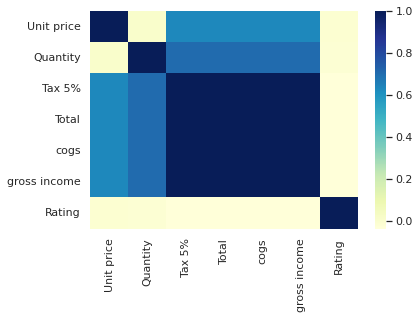

In [ ]:
sns.heatmap(df_corr, cmap = 'YlGnBu')

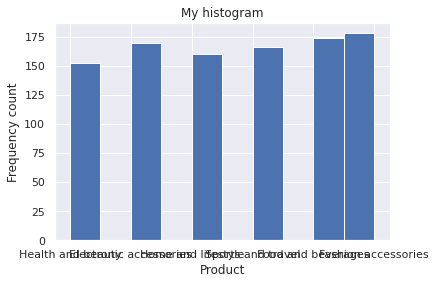

In [ ]:

import matplotlib.pyplot as plt

plt.hist(data['Product line'])
plt.ylabel('Frequency count')
plt.xlabel('Product');
plt.title('My histogram')
plt.show()

In [ ]:
pd.get_dummies(data, columns=["Product line", "City"]).head()

,Invoice ID,Branch,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,...,Rating,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,City_Mandalay,City_Naypyitaw,City_Yangon
0,750-67-8428,A,Member,Female,74.69,7,26.1415,548.9715,1/5/2019,13:08,...,9.1,0,0,0,1,0,0,0,0,1
1,226-31-3081,C,Normal,Female,15.28,5,3.8200,80.2200,3/8/2019,10:29,...,9.6,1,0,0,0,0,0,0,1,0
2,631-41-3108,A,Normal,Male,46.33,7,16.2155,340.5255,3/3/2019,13:23,...,7.4,0,0,0,0,1,0,0,0,1
3,123-19-1176,A,Member,Male,58.22,8,23.2880,489.0480,1/27/2019,20:33,...,8.4,0,0,0,1,0,0,0,0,1
4,373-73-7910,A,Normal,Male,86.31,7,30.2085,634.3785,2/8/2019,10:37,...,5.3,0,0,0,0,0,1,0,0,1


PREFIX-SPAN

In [2]:
!pip3 install -U prefixspan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11239 sha256=b5a885fdc48eafe2b29f0beb61ed8513e207e1e679cf1520eb788362671e09a1
  Stored in directory: /root/.cache/pip/wheels/13/c9/8d/4e8ae7e9db7a435d63161a1e8d4c9bc50795078840a8d948b1
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=751ac490ff36d02b07b8c2d8fa2447e88d3d2f525fd9d75f0616bc1b3186e6d8
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28885 sha256=86be8de8738dab85eecc2033960807c92effe767f8c64d99ef5effb575e9fed4
  Stored in directory: /root/.cache/pip/wheels/f0/fd/a0/de2750b15ae6ca6f016954f5454f545f7583a1ab71ca2cc35d
Successfully built prefixspan docopt extratools


In [6]:
#prefixspan-cli (frequent | top-k) <threshold> [options] [<file>]
import prefixspan as seggs
#prefixspan-cli --help

